In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import math

import pandas as pd
import numpy as np

# from scipy.spatial.distance import pdist

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# from ipywidgets import interact, interact_manual
# from ipywidgets import FloatSlider

from umap import UMAP

# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# from sklearn.cluster import DBSCAN, KMeans
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix

<IPython.core.display.Javascript object>

In [3]:
id_tag = pd.read_csv("../data/filtered_id_tags.csv", index_col=0)
id_tag.head(2)

,fm_tag
id,
1lYmMZLBWTHPybgmK00OR1,alternative rap
0V9A00lULZ9ZzNslRXbvIZ,alternative rap


<IPython.core.display.Javascript object>

In [4]:
mult_id_tag = pd.read_csv("../data/filtered_mult_id_tag.csv", index_col=0)
mult_id_tag.head(2)

,sp_tag_cons,fm_tag,sp_filled,fm_filled
id,,,,
1lYmMZLBWTHPybgmK00OR1,NaN,alternative rap,alternative rap,alternative rap
5MC3xdlx9DFop1Y4J1yDbE,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [5]:
orig_lyrics = pd.read_csv("../data/lyrics.csv", index_col=0)
orig_lyrics.head(2)

,original,cleaned,lang
id,,,
1oK6IuZqBqljKHS3bFNUg7,Puff puff pass and I'm in that\nCircle with my...,puff puff pass circl boy roll weed zig zag lig...,en
1MSY5BfSg3wmtUFmtSBjs5,"Yo, what's happenin Cold 187\nYo man, you know...",yo happenin cold yo man know laid back studio ...,en


<IPython.core.display.Javascript object>

In [6]:
timbre_cov_df = pd.read_csv("../data/timbre_df.csv", index_col=0)
timbre_cov_df.index = timbre_cov_df["id"]
timbre_cov_df = timbre_cov_df.drop("id", 1)
timbre_cov_df.head(2)

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t9-t9,t10-t9,t11-t9,t0-t10,t1-t10,t10-t10,t0-t11,t1-t11,t10-t11,t11-t11
id,,,,,,,,,,,,,,,,,,,,,
1oK6IuZqBqljKHS3bFNUg7,51.823612,20.298719,-7.290977,-11.141729,27.893418,-17.370409,2.325935,-5.247523,7.916673,1.860364,...,293.081866,-9.255381,12.45546,-3.977513,-48.312000,261.299412,-7.627733,-75.358357,-16.209842,174.110043
1MSY5BfSg3wmtUFmtSBjs5,42.902985,57.353380,-8.897260,0.845510,34.859784,-18.322556,-10.257845,2.666678,-3.077387,6.007564,...,325.858969,-35.039057,0.69071,2.864370,78.139559,289.719916,-5.924260,57.640365,-25.937092,187.967932


<IPython.core.display.Javascript object>

In [7]:
orig_lyrics = orig_lyrics[orig_lyrics["cleaned"].isna() == False]

<IPython.core.display.Javascript object>

In [78]:
# tag = "sp_tag_cons"
# tag = "fm_tag"
# tag = "sp_filled"
tag = "fm_filled"
# drop_classes = ["conscious rap", "east coast", "southern"]
# drop_classes = ["conscious rap", "alternative rap", "gangsta rap", "trap"]
drop_classes = [
    x
    for x in list(mult_id_tag[tag].unique())
    if x not in ["east coast", "trap", "gangsta rap"]
]
# drop_classes = []
mult_id_tag[tag].value_counts()

alternative rap    884
southern           881
trap               768
west coast         737
gangsta rap        472
east coast         422
conscious rap      140
Name: fm_filled, dtype: int64

<IPython.core.display.Javascript object>

In [79]:
tag_index = mult_id_tag[
    (mult_id_tag[tag].isna() == False) & (mult_id_tag[tag].isin(drop_classes) == False)
].index

<IPython.core.display.Javascript object>

In [80]:
mult_id_tag.loc[tag_index][tag].value_counts()

trap           768
gangsta rap    472
east coast     422
Name: fm_filled, dtype: int64

<IPython.core.display.Javascript object>

In [81]:
orig_lyrics_filt = orig_lyrics.loc[orig_lyrics.index.isin(tag_index)]

<IPython.core.display.Javascript object>

In [82]:
lyrics = pd.read_csv("../data/cleaned_3_lyrics.csv", index_col=0)
lyrics.head(2)

,original,cleaned,lang,fm_tag,cleaned_2,cleaned_3
id,,,,,,
1lYmMZLBWTHPybgmK00OR1,"Yo, huh, yo\n\nAy tell me I am different if yo...",yo huh yo ay tell differ feel chang mayb undif...,en,alternative rap,yo huh yo ay tell differ feel chang mayb undif...,yo huh yo ay tell different feel changed maybe...
0V9A00lULZ9ZzNslRXbvIZ,Undermining overthinking all the time\nYou kno...,undermin overthink time know know lens bifoc b...,en,alternative rap,undermin overthink lens bifoc bifurc sign true...,undermining overthinking time know know lenses...


<IPython.core.display.Javascript object>

In [83]:
tfidf = TfidfVectorizer(
    max_df=0.5, min_df=2, use_idf=True, norm=u"l2", smooth_idf=True, ngram_range=(2, 5)
)
vectorized = tfidf.fit_transform(orig_lyrics_filt["cleaned"])

<IPython.core.display.Javascript object>

In [84]:
vectorized.shape

(1604, 53325)

<IPython.core.display.Javascript object>

In [85]:
umap = UMAP(
    n_components=2,
    n_neighbors=40,
    min_dist=0.001,
    metric="cosine",
    random_state=42,
)
umap_df = pd.DataFrame(umap.fit_transform(vectorized), columns=["c0", "c1"])
umap_df["fm_tag"] = mult_id_tag.loc[orig_lyrics_filt.index, tag].values


<IPython.core.display.Javascript object>

/home/b1t/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='c0', ylabel='c1'>

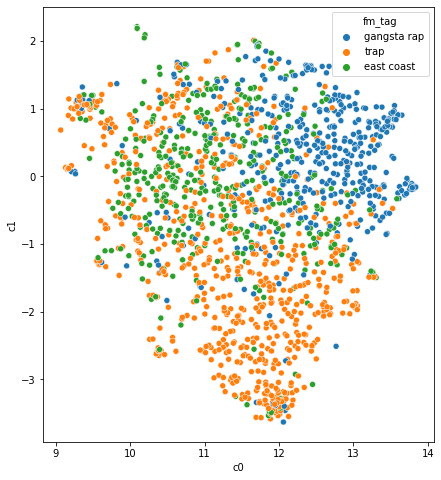

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(7, 8))
sns.scatterplot("c0", "c1", data=umap_df, hue="fm_tag")

In [87]:
scaler = StandardScaler()
std_X = scaler.fit_transform(timbre_cov_df.loc[orig_lyrics_filt.index, :])
umap = UMAP(
    n_components=2,
    n_neighbors=40,
    min_dist=0.001,
    metric="cosine",
    random_state=42,
)
umap_df2 = pd.DataFrame(umap.fit_transform(std_X), columns=["c0", "c1"])
umap_df2["fm_tag"] = mult_id_tag.loc[orig_lyrics_filt.index, tag].values


<IPython.core.display.Javascript object>

/home/b1t/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='c0', ylabel='c1'>

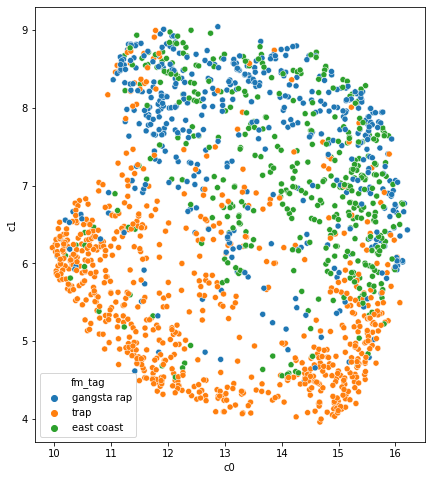

<IPython.core.display.Javascript object>

In [88]:
plt.figure(figsize=(7, 8))
sns.scatterplot("c0", "c1", data=umap_df2, hue="fm_tag")

In [77]:
X = vectorized
y = mult_id_tag.loc[orig_lyrics_filt.index, tag]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=34
)

<IPython.core.display.Javascript object>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

In [21]:
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [ ]:
rfc.score(X_train, y_train)

In [ ]:
X = timbre_cov_df.loc[orig_lyrics_filt.index, :]
y = mult_id_tag.loc[orig_lyrics_filt.index, tag]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=34
)

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

In [ ]:
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

In [ ]:
xgb.score(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
gs = xgb.classes_

In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred, normalize="pred"),
    index=gs,
    columns=gs,
).round(2)

In [ ]:
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

In [ ]:
xgb.score(X_train, y_train)

In [ ]:
timbre_cov = pd.read_csv("../data/filtered_timbre_cov.csv", index_col=0)
timbre_cov.head(2)

In [ ]:
X = timbre_cov.drop("fm_tag", 1)
y = timbre_cov["fm_tag"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=34
)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)